# Рубежный контроль №1

## ФИО: Андреев Алексей ИУ5-23М

## Вариант 16

#### Описание датасета
> Датасет с данными о прокате велосипедов в Лондоне.

Данные в датасете представляют информацию о погодных условиях, дате/времени и количестве велосипедов взятых на прокат в Лондоне за несколько лет

#### Описание колонок
Год — год, когда велосипед взят в аренду.

Месяц — месяц, когда велосипед взят в аренду.

День — день, когда велосипед взят в аренду.

Время — время в часах, когда велосипед взят в аренду.

Количество велосипедов — количество велосипедов, которые были взяты напрокат.

Температура воздуха  — температура воздуха в градусах Цельсия.

Ощущаемая температура — температура воздуха, ощущаемую человеком в градусах Цельсия.

Влажность воздуха — текущую влажность воздуха, выраженную в процентах.

Скорость ветра — скорость ветра в километрах в час.

Код погоды — 1 - Ясно; 2 - Кучевые облака; 3 – Перистые облака 4 – Облачно; 7 - Дождь / Легкий дождь; 10 - Дождь с грозой; 26 – Снегопад; 94 - Замораживание тумана

Выбранный день - праздничный — 1 если праздничный день.

Выбранный день день - 1 если выходной.

Время года — 0-весна; 1-лето; 2-осень; 3-зима.


## Подготовка датасета

In [3]:
import random
from pprint import pprint

import pandas as pd
import numpy as np

import scipy.stats as stats

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
data = pd.read_csv("london_merged.csv")

data['year'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).year))
data['month'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).month))
data['day'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).day))
data['hour'] = pd.DataFrame(data['timestamp'].apply(lambda x: pd.to_datetime(x).hour))

data.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0,2015,1,4,5
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,6
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0,2015,1,4,7
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0,2015,1,4,8
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0,2015,1,4,9


# Задача 16

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием преобразования Бокса-Кокса (Box-Cox transformation).

## Нормализация числового признака wind_speed с использованием преобразования Бокса-Кокса (Box-Cox transformation)

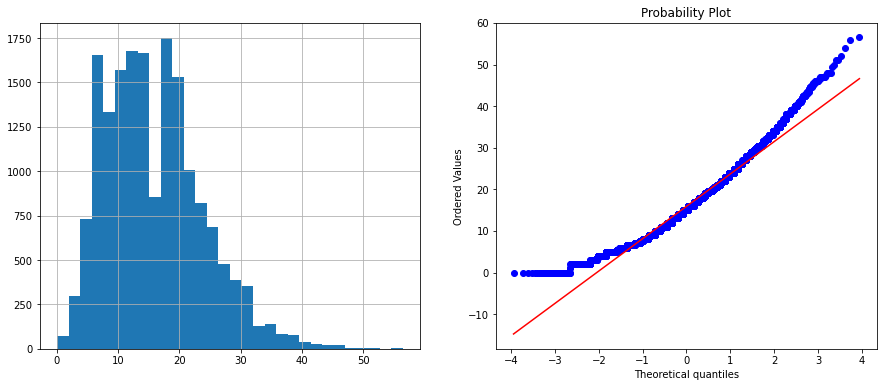

In [8]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()
    
diagnostic_plots(data, 'wind_speed')

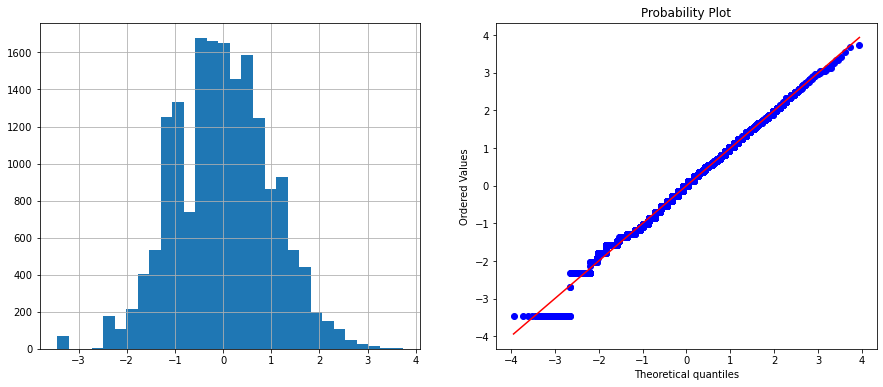

In [14]:
from sklearn.preprocessing import power_transform

data['wind_speed_box_coxed'] = power_transform((data['wind_speed']+0.001).to_numpy().reshape(-1,1), method='box-cox')
diagnostic_plots(data, 'wind_speed_box_coxed')

# Задача 36

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте класс SelectKBest для 5 лучших признаков, и метод, основанный на взаимной информации.

In [64]:
from sklearn.feature_selection import SelectKBest, f_regression

# feature selection
def select_features(X_train, y_train, k):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=k)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
    
	return X_train_fs, fs

X = data.drop(columns = ['timestamp','is_weekend', 'is_holiday','season', 'cnt','year', 'day'])
y = data['cnt']

X_new = SelectKBest(f_regression, k=4).fit_transform(X, y)
X_new.shape

X_fs, fs = select_features(X, y, 5)

print(f"Выбранные признаки: {list(X.columns[fs.get_support()])}")

Выбранные признаки: ['t1', 't2', 'hum', 'weather_code', 'hour']


## Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

График будет строиться для колонки "влажность"(humidity)

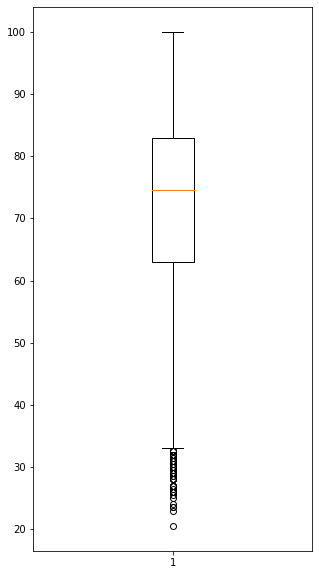

In [72]:
plt.figure(figsize=(5,10))
plt.boxplot(data['hum']);